#Import

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Reshape, RepeatVector, TimeDistributed, Conv2D, GRU, MaxPooling2D, LSTM, Dense, Dropout, Input, Reshape, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

Checking Available GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Num GPUs Available:  0


#Keras Deep Learning

In [6]:
def create_keras_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - accuracy: 0.7183 - loss: 0.5269 - val_accuracy: 0.6271 - val_loss: 0.7139
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7560 - loss: 0.4587 - val_accuracy: 0.5428 - val_loss: 0.6524
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7612 - loss: 0.4513 - val_accuracy: 0.3086 - val_loss: 0.7901
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7680 - loss: 0.4398 - val_accuracy: 0.6661 - val_loss: 0.6204
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.7713 - loss: 0.4345 - val_accuracy: 0.3184 - val_loss: 0.8336
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.7732 - loss: 0.4319 - val_accuracy: 0.7293 - val_loss: 0.6812
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.7751 - loss: 0.4285 - val_accuracy: 0.4221 - val_loss: 0.7961
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 

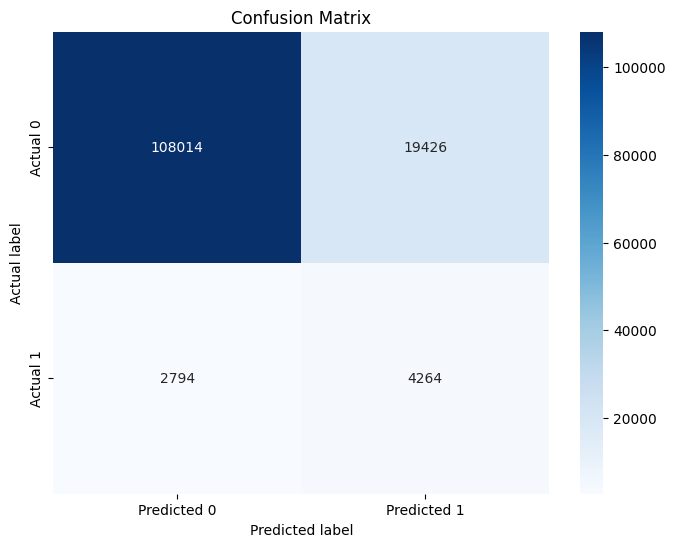

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


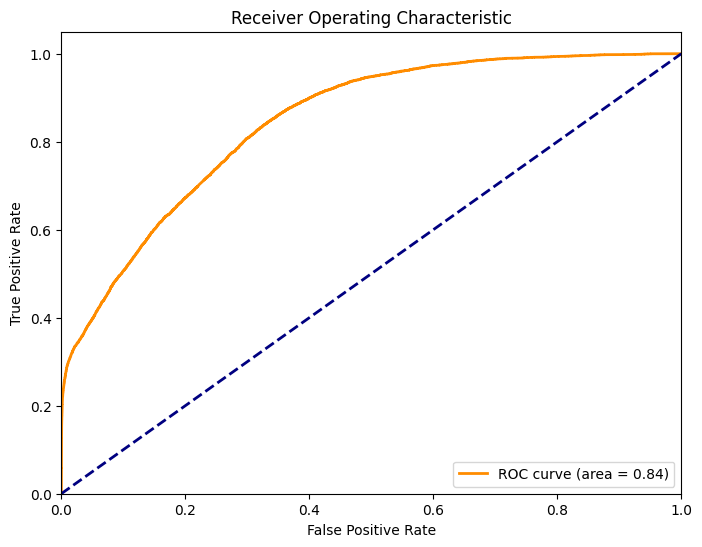

,Metric,Value
0,Accuracy,0.834793
1,Precision,0.179992
2,Recall,0.604137
3,F1-Score,0.277351
4,TPR,0.604137
5,FPR,0.152433
6,TNR,0.847567
7,FNR,0.395863
8,Youden's J,0.451705


In [7]:
X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)


input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

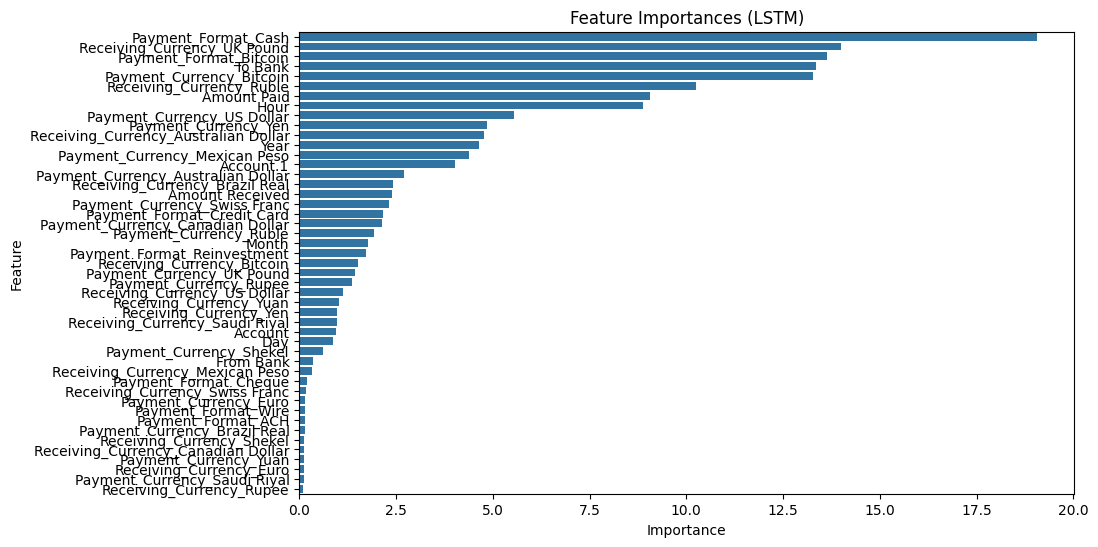

In [8]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - accuracy: 0.7202 - loss: 0.5234 - val_accuracy: 0.6923 - val_loss: 0.6449
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7576 - loss: 0.4568 - val_accuracy: 0.6949 - val_loss: 0.5948
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7649 - loss: 0.4465 - val_accuracy: 0.6909 - val_loss: 0.6720
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.7698 - loss: 0.4385 - val_accuracy: 0.7107 - val_loss: 0.6023
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7713 - loss: 0.4345 - val_accuracy: 0.6438 - val_loss: 0.6974
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7740 - loss: 0.4300 - val_accuracy: 0.5915 - val_loss: 0.6775
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.7756 - loss: 0.4288 - val_accuracy: 0.5800 - val_loss: 0.6317
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 

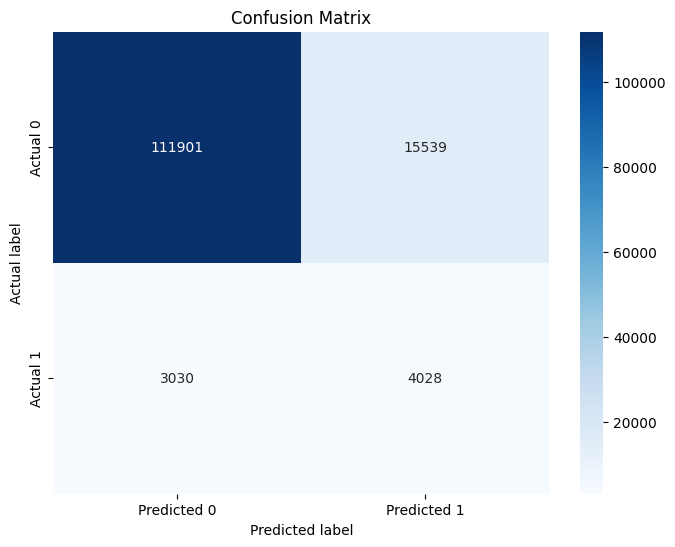

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


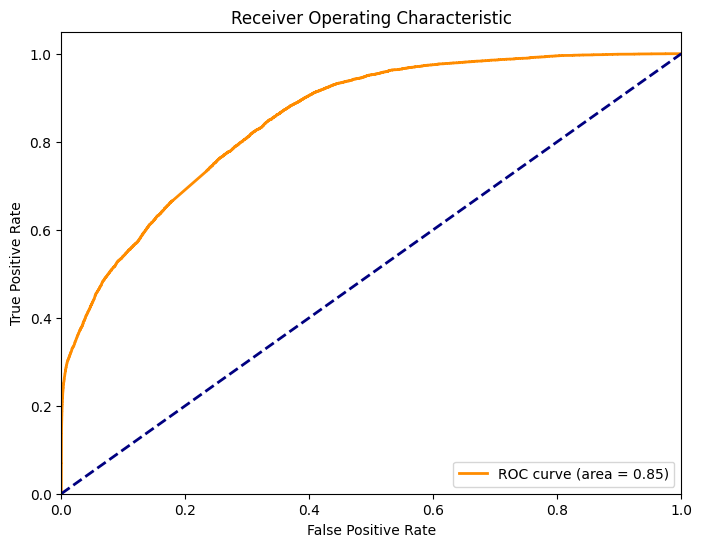

,Metric,Value
0,Accuracy,0.861938
1,Precision,0.205857
2,Recall,0.570700
3,F1-Score,0.302573
4,TPR,0.570700
5,FPR,0.121932
6,TNR,0.878068
7,FNR,0.429300
8,Youden's J,0.448768


In [10]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)


input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

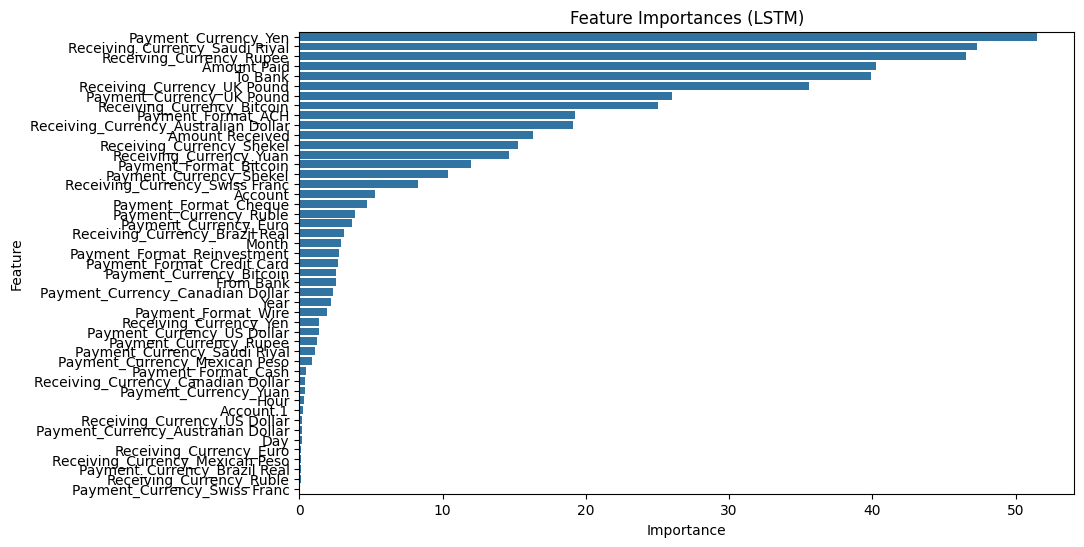

In [11]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Recurrent Neural Networks

In [12]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step - accuracy: 0.6687 - loss: 0.6119 - val_accuracy: 0.0000e+00 - val_loss: 1.0480
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 125s 5ms/step - accuracy: 0.7132 - loss: 0.5331 - val_accuracy: 0.2847 - val_loss: 0.7512
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 123s 5ms/step - accuracy: 0.7294 - loss: 0.5067 - val_accuracy: 0.0744 - val_loss: 0.8631
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step - accuracy: 0.7333 - loss: 0.4990 - val_accuracy: 0.1988 - val_loss: 0.8363
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 126s 5ms/step - accuracy: 0.7387 - loss: 0.4882 - val_accuracy: 0.1722 - val_loss: 0.8547
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step - accuracy: 0.7407 - loss: 0.4843 - val_accuracy: 0.7902 - val_loss: 0.6316
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step - accuracy: 0.7396 - loss: 0.4860 - val_accuracy: 0.7870 - val_loss: 0.6473
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step 

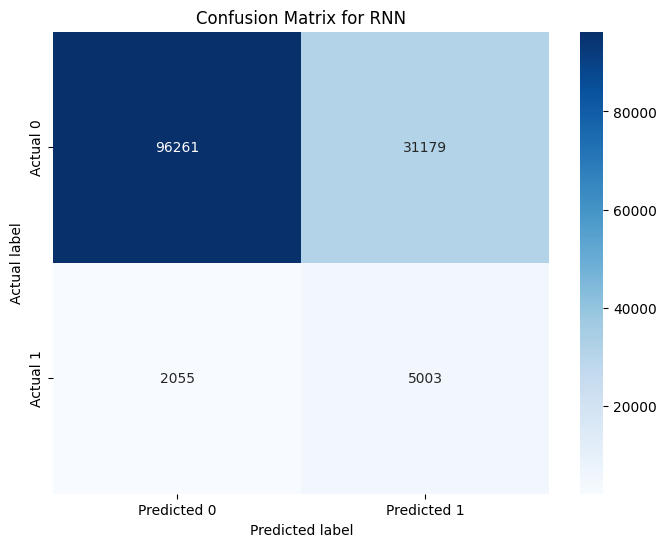

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


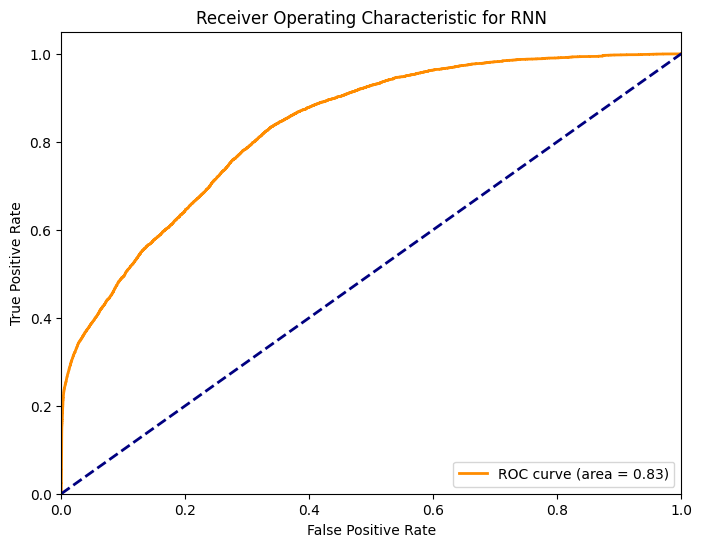

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.752903
1,Precision,0.138273
2,Recall,0.708841
3,F1-Score,0.231406
4,TPR,0.708841
5,FPR,0.244656
6,TNR,0.755344
7,FNR,0.291159
8,Youden's J,0.464185


In [13]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

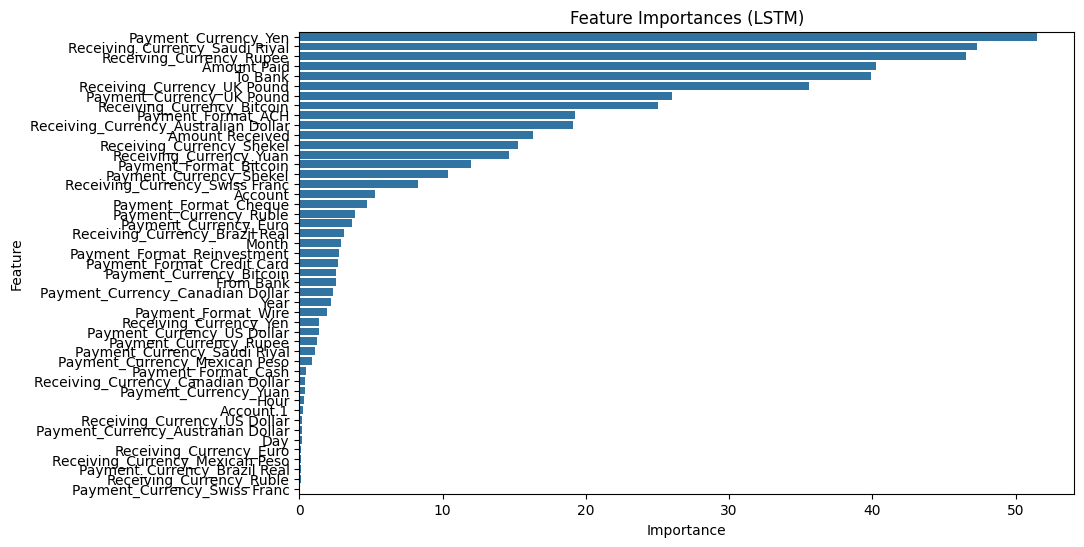

In [14]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 126s 5ms/step - accuracy: 0.6754 - loss: 0.6049 - val_accuracy: 0.1434 - val_loss: 1.1559
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - accuracy: 0.7142 - loss: 0.5295 - val_accuracy: 0.2481 - val_loss: 0.7636
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 122s 5ms/step - accuracy: 0.7291 - loss: 0.5002 - val_accuracy: 0.7025 - val_loss: 0.6986
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 122s 5ms/step - accuracy: 0.7385 - loss: 0.4873 - val_accuracy: 0.3770 - val_loss: 0.7121
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 124s 5ms/step - accuracy: 0.7397 - loss: 0.4841 - val_accuracy: 0.1723 - val_loss: 0.9729
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 123s 5ms/step - accuracy: 0.7400 - loss: 0.4824 - val_accuracy: 0.5948 - val_loss: 0.6542
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.7424 - loss: 0.4800 - val_accuracy: 0.2201 - val_loss: 0.7225
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accu

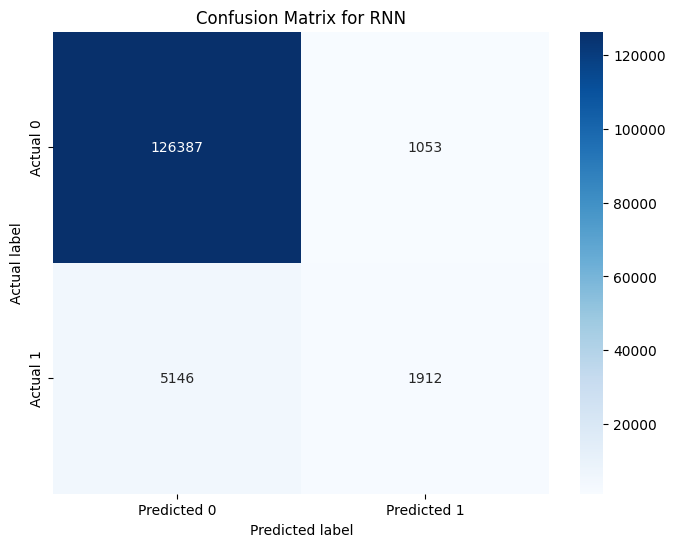

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


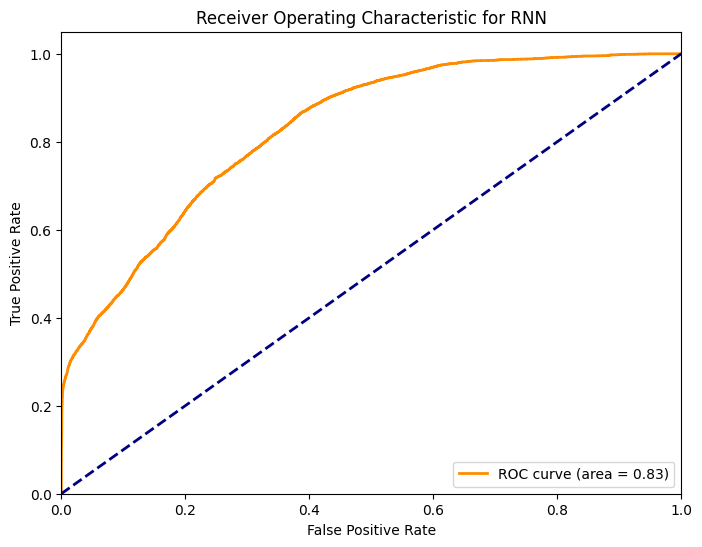

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.953910
1,Precision,0.644857
2,Recall,0.270898
3,F1-Score,0.381522
4,TPR,0.270898
5,FPR,0.008263
6,TNR,0.991737
7,FNR,0.729102
8,Youden's J,0.262636


In [15]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

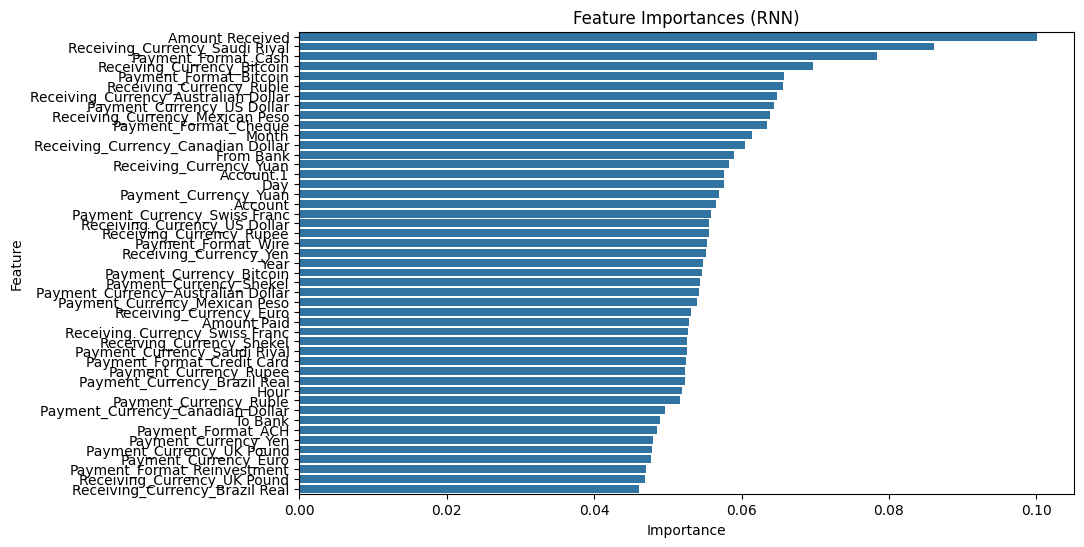

In [16]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Long Short Term Memory

In [17]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 138s 5ms/step - accuracy: 0.6689 - loss: 0.6125 - val_accuracy: 0.0052 - val_loss: 1.0342
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 135s 5ms/step - accuracy: 0.6979 - loss: 0.5735 - val_accuracy: 0.1523 - val_loss: 0.9359
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 0.7170 - loss: 0.5230 - val_accuracy: 0.1274 - val_loss: 0.9160
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 135s 5ms/step - accuracy: 0.7272 - loss: 0.5051 - val_accuracy: 0.1766 - val_loss: 0.7486
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 133s 5ms/step - accuracy: 0.7293 - loss: 0.5017 - val_accuracy: 0.6653 - val_loss: 0.7037
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 132s 5ms/step - accuracy: 0.7293 - loss: 0.5032 - val_accuracy: 0.1828 - val_loss: 0.7179
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 135s 5ms/step - accuracy: 0.7325 - loss: 0.4956 - val_accuracy: 0.1388 - val_loss: 0.7954
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - ac

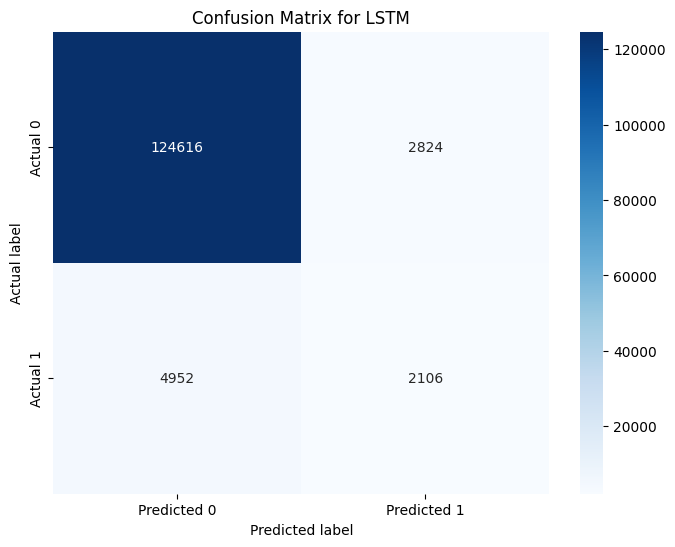

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


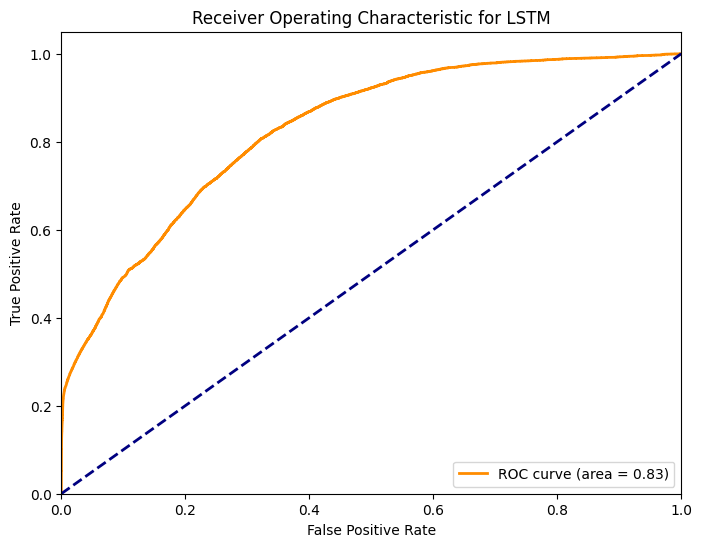

Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.942185
1,Precision,0.427181
2,Recall,0.298385
3,F1-Score,0.351351
4,TPR,0.298385
5,FPR,0.022159
6,TNR,0.977841
7,FNR,0.701615
8,Youden's J,0.276225


In [18]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

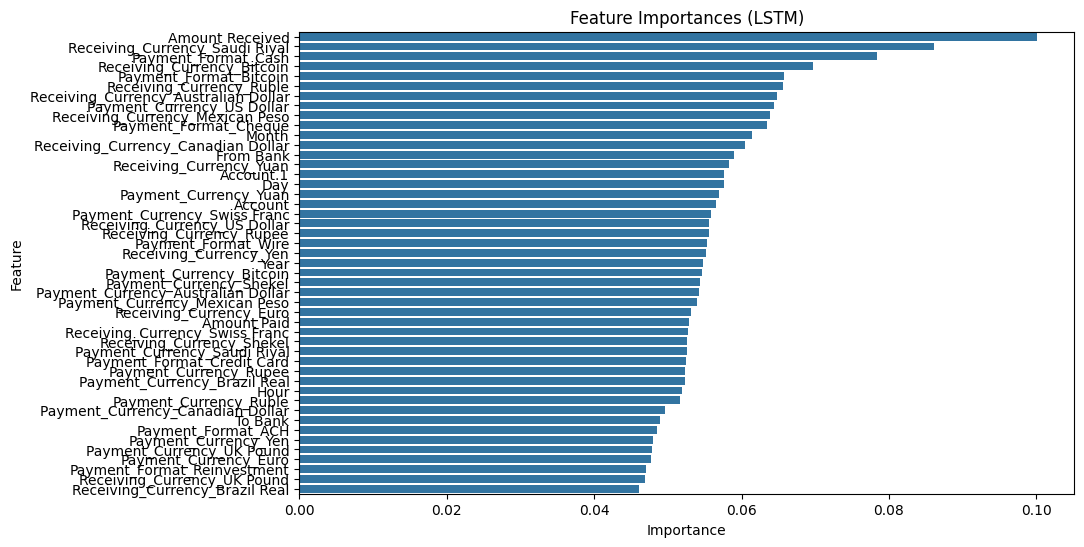

In [19]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 138s 5ms/step - accuracy: 0.6726 - loss: 0.6066 - val_accuracy: 0.1415 - val_loss: 0.9537
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 0.7151 - loss: 0.5350 - val_accuracy: 0.1841 - val_loss: 0.8567
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 0.7214 - loss: 0.5203 - val_accuracy: 0.2251 - val_loss: 0.8194
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 134s 5ms/step - accuracy: 0.7301 - loss: 0.5035 - val_accuracy: 0.2671 - val_loss: 0.7380
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 133s 5ms/step - accuracy: 0.7286 - loss: 0.5011 - val_accuracy: 0.2114 - val_loss: 0.8391
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - accuracy: 0.7323 - loss: 0.4954 - val_accuracy: 0.6314 - val_loss: 0.6727
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 130s 5ms/step - accuracy: 0.7359 - loss: 0.4893 - val_accuracy: 0.8236 - val_loss: 0.6422
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 131s 5ms/step - ac

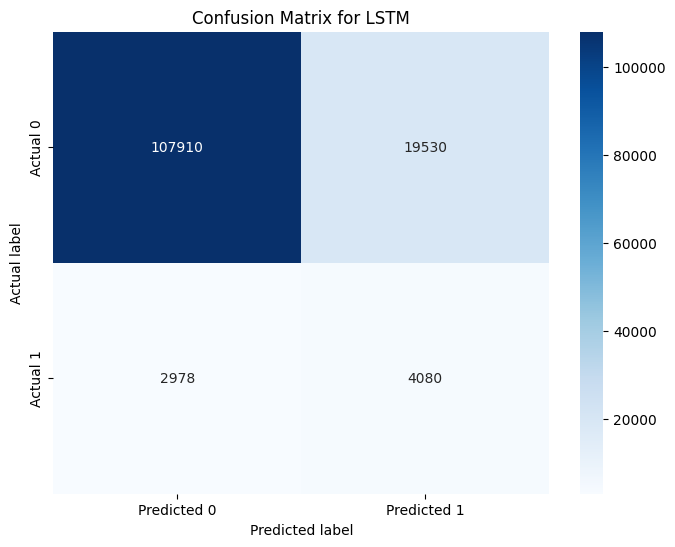

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


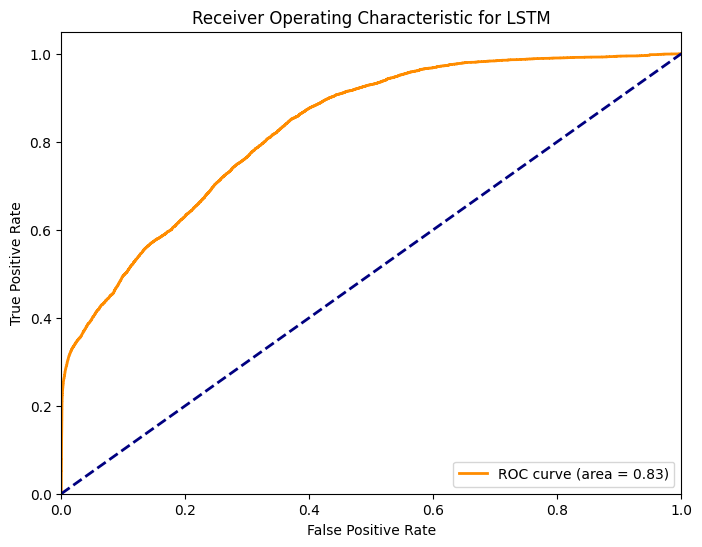

Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.832652
1,Precision,0.172808
2,Recall,0.578067
3,F1-Score,0.266075
4,TPR,0.578067
5,FPR,0.153249
6,TNR,0.846751
7,FNR,0.421933
8,Youden's J,0.424819


In [20]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

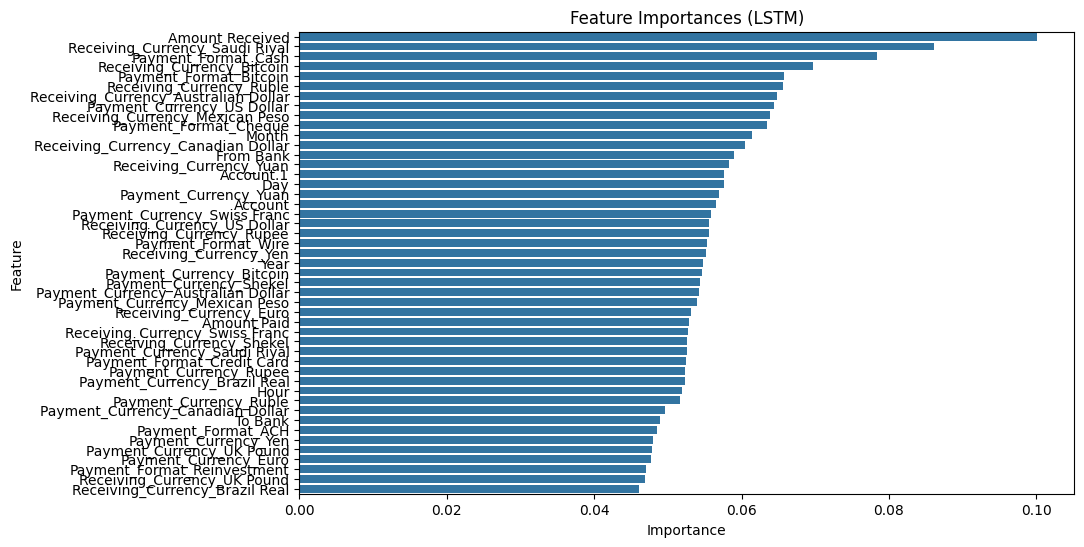

In [21]:

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()